In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
# # 指定使用的 GPU
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_visible_devices(gpus[0], 'GPU')


# # 获取可用的 GPU 设备列表
# gpus = tf.config.experimental.list_physical_devices('GPU')

# # 如果没有可用的 GPU 设备，则输出错误信息
# if not gpus:
#     print("No available GPU devices!")
# else:
#     # 输出可用的 GPU 设备信息
#     for gpu in gpus:
#         print(gpu)

In [2]:
# 定义超参数
lr = 0.001
batch_size = 512
num_epochs = 40

# 定义卷积神经网络模型
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(32, 32, 3)), # 输入通道数为3，输出通道数为64，卷积核大小为3x3，填充为1
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)), # 输入通道数为64，输出通道数为64，卷积核大小为3x3，填充为1
    tf.keras.layers.MaxPooling2D(2, 2), # 最大池化层，大小为2x2，步幅为2
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'), # 输入通道数为64，输出通道数为128，卷积核大小为3x3，填充为1
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)), # 输入通道数为128，输出通道数为128，卷积核大小为3x3，填充为1
    # 设置 kernel_regularizer 参数来实现 L2 正则化。其中 0.001 是 L2 正则化系数。
    tf.keras.layers.MaxPooling2D(2, 2), # 最大池化层，大小为2x2，步幅为2
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'), # 输入通道数为128，输出通道数为256，卷积核大小为3x3，填充为1
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)), # 输入通道数为256，输出通道数为256，卷积核大小为3x3，填充为1
    tf.keras.layers.MaxPooling2D(2, 2), # 最大池化层，大小为2x2，步幅为2
    tf.keras.layers.Flatten(), # 将张量展开为一维张量
    tf.keras.layers.Dense(1024, activation='relu'), # 全连接层1，输入维度为256*4*4，输出维度为1024
    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)), # 全连接层2，输入维度为1024，输出维度为512
    tf.keras.layers.Dense(10, activation='softmax') # 输出层，输入维度为512，输出维度为10
])

# 定义训练集和测试集的数据增强
train_transform = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

test_transform = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

In [3]:
# 加载 CIFAR-10 数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 将标签转换为 one-hot 编码
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# 对训练集和测试集的特征进行数据增强和标准化处理
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.map(lambda x, y: (train_transform(x), y))
train_dataset = train_dataset.batch(batch_size=batch_size)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(lambda x, y: (test_transform(x), y))
test_dataset = test_dataset.batch(batch_size=batch_size)
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# 定义优化器和损失函数
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# 编译模型
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# 训练模型
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Epoch 1/40
98/98 [==============================] - 166s 2s/step - loss: 2.4035 - accuracy: 0.2159 - val_loss: 1.9214 - val_accuracy: 0.3401
Epoch 2/40
98/98 [==============================] - 165s 2s/step - loss: 1.7848 - accuracy: 0.3778 - val_loss: 1.7056 - val_accuracy: 0.4052
Epoch 3/40
98/98 [==============================] - 165s 2s/step - loss: 1.6058 - accuracy: 0.4431 - val_loss: 1.4525 - val_accuracy: 0.4907
Epoch 4/40
98/98 [==============================] - 165s 2s/step - loss: 1.4623 - accuracy: 0.4927 - val_loss: 1.3536 - val_accuracy: 0.5300
Epoch 5/40
98/98 [==============================] - 164s 2s/step - loss: 1.3403 - accuracy: 0.5445 - val_loss: 1.2578 - val_accuracy: 0.5796
Epoch 6/40
98/98 [==============================] - 164s 2s/step - loss: 1.2435 - accuracy: 0.

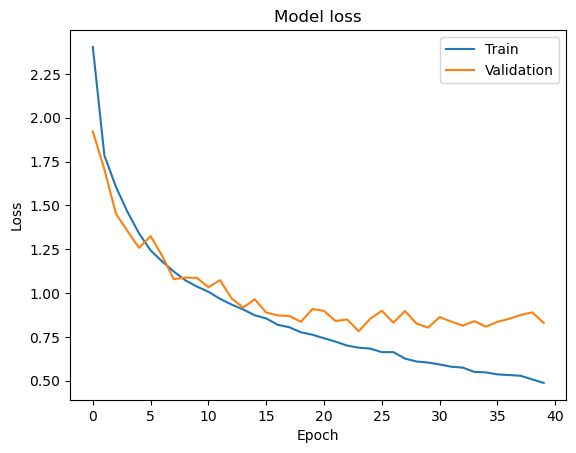

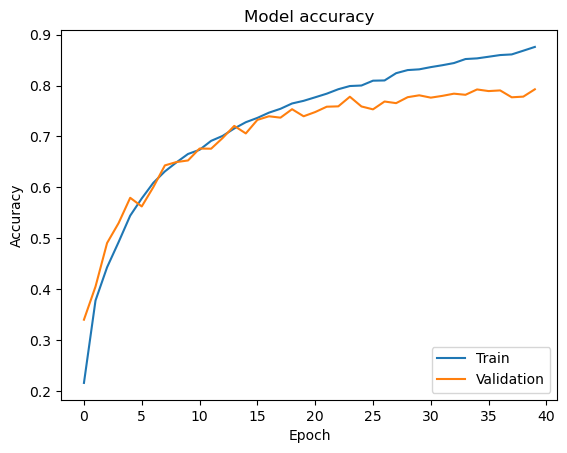

In [4]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [5]:
model.save('my_model2.h5') # 保存为.h5格式

In [6]:
from tensorflow.keras.models import load_model

# 读取模型
model = load_model('my_model2.h5')

# 进行测试
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

20/20 [==============================] - 6s 307ms/step - loss: 0.8299 - accuracy: 0.7927
Test accuracy: 0.7926999926567078


20/20 [==============================] - 6s 312ms/step
Class 0：airplane accuracy: 83.30%
Class 1：automobile accuracy: 92.60%
Class 2：bird accuracy: 79.70%
Class 3：cat accuracy: 64.00%
Class 4：deer accuracy: 64.40%
Class 5：dog accuracy: 67.20%
Class 6：frog accuracy: 87.70%
Class 7：horse accuracy: 82.60%
Class 8：ship accuracy: 84.10%
Class 9：truck accuracy: 87.10%


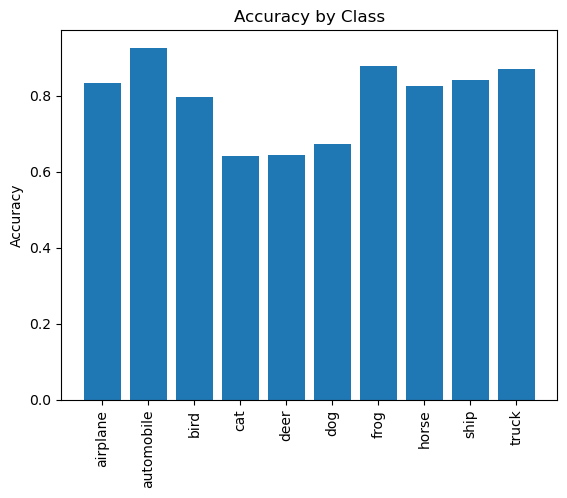

In [16]:
# 加载 CIFAR-10 数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 将标签转换为 one-hot 编码
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 预测测试集的标签
y_pred = model.predict(test_dataset)

# 计算每个类别的准确率
correct_counts = [0] * 10
total_counts = [0] * 10
for i in range(len(y_pred)):
    pred_label = tf.argmax(y_pred[i]).numpy()
    true_label = tf.argmax(y_test[i]).numpy()
    total_counts[true_label] += 1
    if pred_label == true_label:
        correct_counts[true_label] += 1

# 打印每个类别的准确率
for i in range(10):
    acc = correct_counts[i] / total_counts[i]
    print('Class {}：{} accuracy: {:.2%}'.format(i, class_names[i] ,acc))
    
# 可视化每个类别的准确率
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
accuracies = [correct_counts[i] / total_counts[i] for i in range(10)]
x_pos = np.arange(len(class_names))
plt.bar(x_pos, accuracies)
plt.xticks(x_pos, class_names, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Accuracy by Class')
plt.show()

Confusion matrix, without normalization
[[833  31  49  11   4   1   3  11  25  32]
 [  5 926   3   2   0   1   1   0   8  54]
 [ 45   8 797  33  19  19  45  19   2  13]
 [ 21  21  91 640  26  76  72  20  13  20]
 [ 17   8 115  35 644  35  69  66   4   7]
 [ 13   6  47 143  25 672  36  41   3  14]
 [  9  13  23  39  12   8 877   5   6   8]
 [ 21   7  36  30  24  29  12 826   0  15]
 [ 68  33  15   7   4   7   7   1 841  17]
 [ 26  73   3   7   0   3   4   3  10 871]]


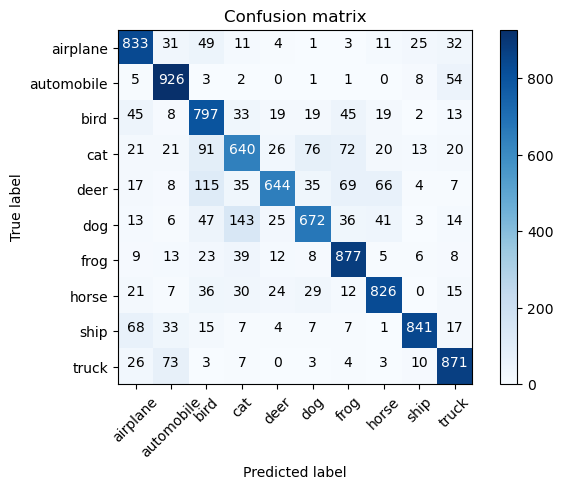

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

# 预测测试集的结果
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 计算混淆矩阵
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# 绘制混淆矩阵
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_mtx, class_names)

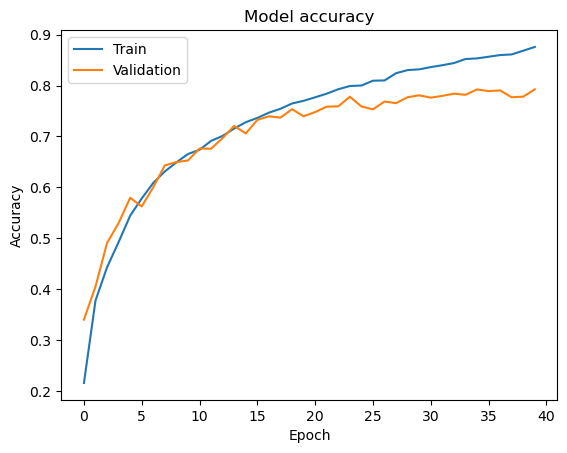

In [18]:
# 绘制训练 / 验证集准确率随时间的变化图
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_accuracy(history)